# Testing and evaluating model

In this notebook:

1.   Test data preparation
2.   Create function to dispay image batch with original and predicted labels
3.   Load ready model from file
4.   Test model's performance on sample data batch
5.   Evaluate model on test set
6.   Compute predictions for test set and create confusion matrix
7.   Compute precision and recall scores for test set



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os
import pathlib

In [0]:
#Path to the dataset
test_dir = '/content/gdrive/My Drive/dataset/3_test'
test_dir = pathlib.Path(test_dir)
test_count = len(list(test_dir.glob('*/*.png')))
CLASS_NAMES = np.array(['bad', 'good'])

In [0]:
#Function for displaying batch with original and predicted classes
def show_batch(image_batch, label_batch, pred=[]):
  plt.figure(figsize=(20,20))
  for n in range(32):
      ax = plt.subplot(4,8,n+1)
      plt.imshow(image_batch[n])
      if len(pred)==0:
        plt.title(str(CLASS_NAMES[int(label_batch[n])]))
      else:
        plt.title("orig: "+str(CLASS_NAMES[int(label_batch[n])])+"\npred: "+str(CLASS_NAMES[int(pred[n])]))
      plt.axis('off')

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 229
IMG_WIDTH = 229
STEPS_PER_EPOCH_T = np.ceil(test_count/BATCH_SIZE)
THRESHOLD = 0.5

In [0]:
#Test batches generator
#Use first option and shuffle=True when testing and displaying sample batch(1st part)
#Use second option and shuffle=False when evaluating and computing predictions(2nd part)

# test_datagen = keras.preprocessing.image.ImageDataGenerator()
test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

test_generator = test_datagen.flow_from_directory(directory=str(test_dir),
                                                  batch_size=BATCH_SIZE,
                                                  # shuffle=True,
                                                  shuffle=False,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='binary')

Found 800 images belonging to 2 classes.


In [0]:
#Load ready model from file
if not 'model' in locals():
  model = tf.keras.models.load_model('/content/gdrive/My Drive/image_x_model_fr.h5')

## 1st part

In [0]:
#Take sample batch from test dataset
image_batch, label_batch = next(test_generator)

#Prepare batch for prediction - apply Xception's preprocess_input function to images
batch_to_predict = np.copy(image_batch)
to_pred = np.vectorize(keras.applications.xception.preprocess_input)
batch_to_predict = to_pred(batch_to_predict)

#Prepare batch for display - apply rescaling to images
batch_to_show = np.copy(image_batch)
to_show = np.vectorize(lambda t: t * 1./255)
batch_to_show = to_show(batch_to_show)

#Use model to make predictions
y_pred = model.predict(batch_to_predict)

#Predict method returns list of probabilities of being a good picture for each image in a batch
#Here change it to list of labels good(1) and bad(0) - threshold = 0.5
pred = []
for x in y_pred:
  if x >= THRESHOLD:
    pred.append(1)
  else:
    pred.append(0)

In [0]:
#Display confusion matrix for samlpe batch
from sklearn.metrics import confusion_matrix

confusion_matrix(label_batch.astype('int'), pred)

array([[28,  0],
       [ 1,  3]])

In [0]:
#Compare predicted and original lables
print(pred)
print(list(label_batch.astype('int')))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


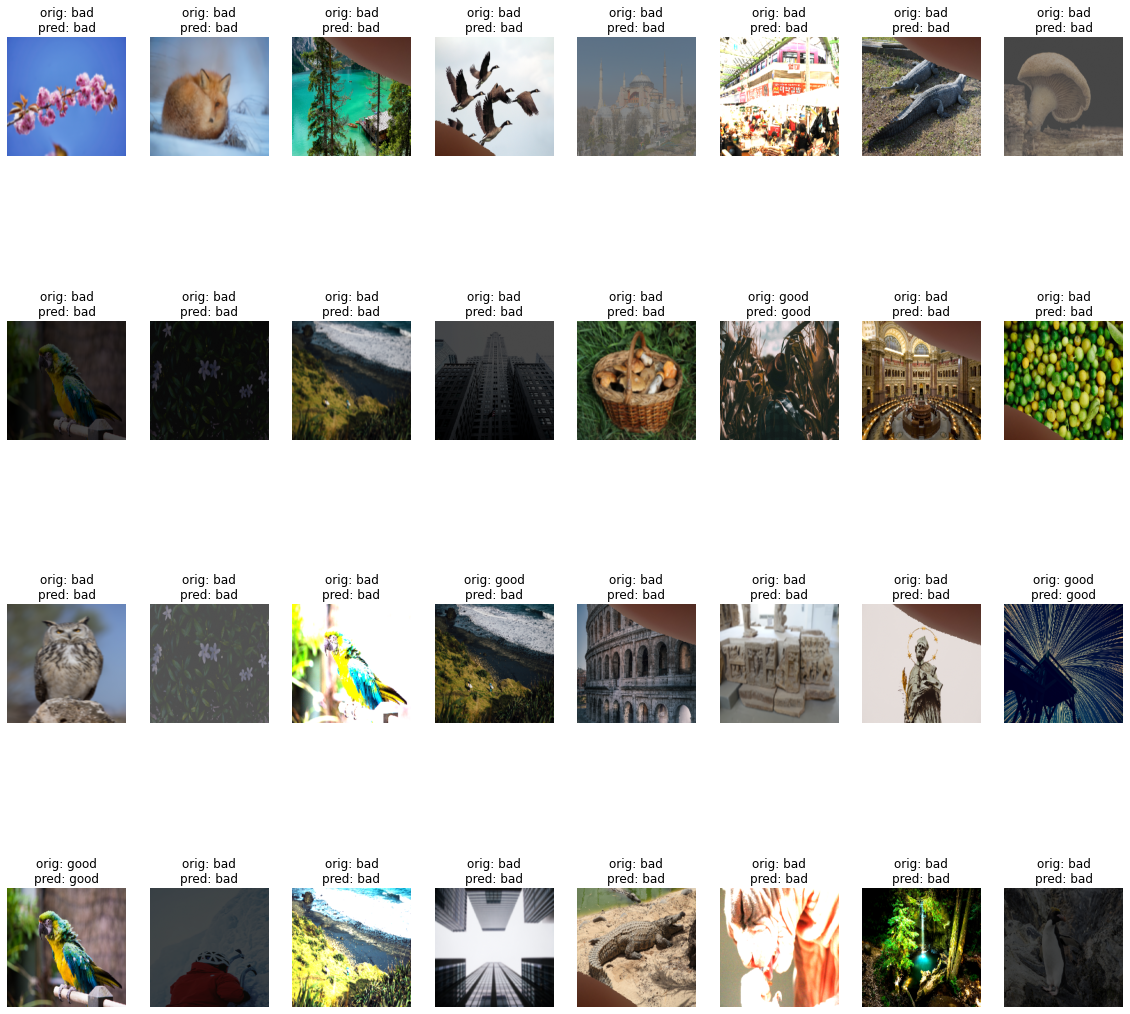

In [0]:
#Display batch of images with their original and predicted labels
show_batch(batch_to_show, label_batch, pred)

In [0]:
#Evaluate the model on test set
model.evaluate(test_generator, batch_size=BATCH_SIZE, steps=STEPS_PER_EPOCH_T)

25/25 [==============================] - 140s 6s/step - loss: 0.0976 - binary_accuracy: 0.9688


[0.09757458418607712, 0.96875]

In [0]:
#Make predictions for the test set
predictions = model.predict(test_generator, steps=STEPS_PER_EPOCH_T)

In [0]:
#Again changing probabilities to classes - threshold = 0.5
full_pred = []
for x in predictions:
  if x >= 0.5:
    full_pred.append(1)
  else:
    full_pred.append(0)
confusion_matrix(test_generator.classes, full_pred)

array([[689,  11],
       [ 14,  86]])

In [0]:
#Compute recall and precision scores for test set
from sklearn.metrics import recall_score, precision_score
print("Precision:", precision_score(test_generator.classes, full_pred), "\nRecall:", recall_score(test_generator.classes, full_pred))

Precision: 0.8865979381443299 
Recall: 0.86


In [0]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
np.array(full_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,